## Multi Class Fizza Classification
 Here are the steps we'll take
 1. Become one with the data
 2. Preprocess the data
 3. Create a model
 4. Fit the model
 5. Evaluate the model
 6. Adjust different hyperparameters to improve the model
 7. Repeat untill satisfied
  

In [25]:
import os
import pathlib
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from zipfile import ZipFile
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Rescaling, RandomFlip, RandomRotation, CenterCrop, RandomHeight,  RandomWidth, Resizing, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory

## Getting the data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zipfile = ZipFile("10_food_classes_all_data.zip")
zipfile.extractall()
zipfile.close()

--2022-09-16 10:38:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   102MB/s    in 4.4s    

2022-09-16 10:38:35 (111 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
for dir_path, dir_name, filename in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dir_path)} and {len(filename)} images in {dir_path}")

There are 33 and 0 images in /content/10_food_classes_all_data
There are 39 and 0 images in /content/10_food_classes_all_data/train
There are 49 and 750 images in /content/10_food_classes_all_data/train/hamburger
There are 53 and 750 images in /content/10_food_classes_all_data/train/chicken_wings
There are 45 and 750 images in /content/10_food_classes_all_data/train/pizza
There are 45 and 750 images in /content/10_food_classes_all_data/train/sushi
There are 45 and 750 images in /content/10_food_classes_all_data/train/steak
There are 49 and 750 images in /content/10_food_classes_all_data/train/ice_cream
There are 53 and 750 images in /content/10_food_classes_all_data/train/chicken_curry
There are 50 and 750 images in /content/10_food_classes_all_data/train/fried_rice
There are 54 and 750 images in /content/10_food_classes_all_data/train/grilled_salmon
There are 45 and 750 images in /content/10_food_classes_all_data/train/ramen
There are 38 and 0 images in /content/10_food_classes_all_da

In [5]:
file_name = pathlib.Path("/content/10_food_classes_all_data/train/")
class_names = np.array(sorted(file.name for file in file_name.glob("*")))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Become one with the data

In [6]:
def view_random_image(directory,class_name):
  filepath = "10_food_classes_all_data"+"/"+directory+"/"+class_name+"/"
  print(filepath)
  random_image = random.sample(os.listdir(filepath),1)
  img = mpimg.imread(filepath+"/"+random_image[0])
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off")
  return img

10_food_classes_all_data/train/ramen/


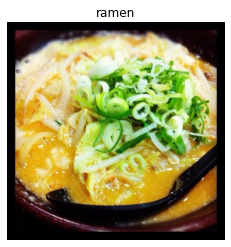

In [7]:
img = view_random_image("train",random.choice(class_names))

In [8]:
img.shape

(512, 512, 3)

In [9]:
img.ndim

3

## Preprocessing the data

In [10]:
# Setting up a scaling layer instance
scaling_layer = Rescaling(scale=1./255)

# Setting up the train and test directory path
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

# Getting all the images from 10 directories from each train and test
train_data = image_dataset_from_directory(train_dir,
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          image_size=(224,224))
train_data_scaled = train_data.map(lambda x, y : (scaling_layer(x),y))

test_data = image_dataset_from_directory(test_dir,
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          image_size=(224,224))
test_data_scaled = test_data.map(lambda x, y : (scaling_layer(x),y))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
len(train_data_scaled), len(test_data_scaled)

(235, 79)

## Building a model

In [12]:
model_1 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_1 = model_1.fit(train_data_scaled,epochs=5,steps_per_epoch=len(train_data_scaled),validation_data=test_data_scaled,validation_steps=(0.25 * len(test_data_scaled)))

Epoch 1/5
235/235 [==============================] - 30s 75ms/step - loss: 2.2236 - accuracy: 0.1597 - val_loss: 2.0178 - val_accuracy: 0.2672
Epoch 2/5
235/235 [==============================] - 18s 73ms/step - loss: 2.0035 - accuracy: 0.2915 - val_loss: 1.9698 - val_accuracy: 0.3031
Epoch 3/5
235/235 [==============================] - 18s 77ms/step - loss: 1.7937 - accuracy: 0.3795 - val_loss: 1.9103 - val_accuracy: 0.3391
Epoch 4/5
235/235 [==============================] - 18s 73ms/step - loss: 1.5900 - accuracy: 0.4516 - val_loss: 2.0310 - val_accuracy: 0.3266
Epoch 5/5
235/235 [==============================] - 18s 73ms/step - loss: 1.3626 - accuracy: 0.5289 - val_loss: 2.1929 - val_accuracy: 0.3047


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.plot(epochs,loss,label="training loss")
    plt.plot(epochs,val_loss,label="Val loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training accuracy")
    plt.plot(epochs,val_accuracy,label="Val Accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

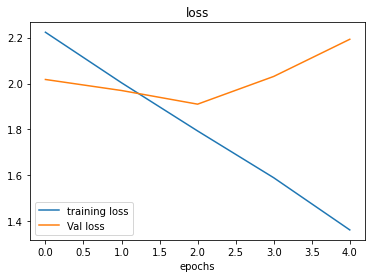

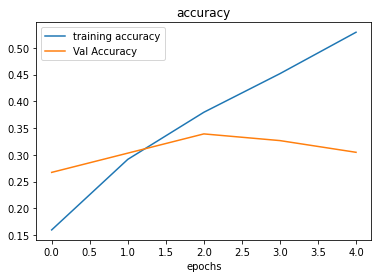

In [15]:
plot_loss_curves(history_1)

seems like our model is overfitting means performs great on training data but performs poorly on test data

##  Improving our baseline model

Let's try and fix overfitting by, there are the steps we can try:

1. **Get More Data**: Having more data gives our model the opportunity to learn diversly
2. **Simplify our mode**: If our model is overfitting , then it means our model iss too complex, we can reduce number of hidden units layers to fix this.
3. **Data Augmentation**: data augmentation manipulates the training data to learn more diversly  

In [16]:
## Let's try to simplify our model first
model_2 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_2 = model_2.fit(train_data_scaled,epochs=5,steps_per_epoch=len(train_data_scaled),validation_data=test_data_scaled,validation_steps=(0.25 * len(test_data_scaled)))

Epoch 1/5
235/235 [==============================] - 18s 71ms/step - loss: 2.1531 - accuracy: 0.2077 - val_loss: 1.9566 - val_accuracy: 0.3094
Epoch 2/5
235/235 [==============================] - 18s 73ms/step - loss: 1.9149 - accuracy: 0.3303 - val_loss: 1.8423 - val_accuracy: 0.3406
Epoch 3/5
235/235 [==============================] - 19s 79ms/step - loss: 1.7520 - accuracy: 0.3972 - val_loss: 1.8142 - val_accuracy: 0.3750
Epoch 4/5
235/235 [==============================] - 20s 84ms/step - loss: 1.5739 - accuracy: 0.4676 - val_loss: 1.8183 - val_accuracy: 0.3734
Epoch 5/5
235/235 [==============================] - 19s 77ms/step - loss: 1.4038 - accuracy: 0.5259 - val_loss: 1.9390 - val_accuracy: 0.3547


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

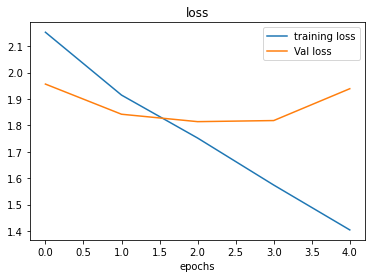

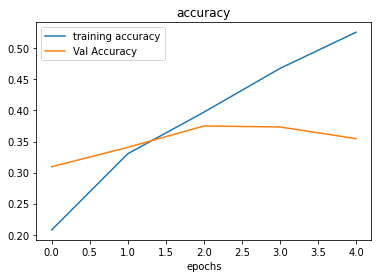

In [18]:
plot_loss_curves(history_2)

In [19]:
# Let's try augmenting our data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_data_augmented = train_data_gen.flow_from_directory(train_dir,
                                                          class_mode="categorical",
                                                          batch_size=32,
                                                          target_size=(224,224),
                                                          seed=42)
test_data = test_data_gen.flow_from_directory(test_dir,
                                              class_mode="categorical",
                                              batch_size=32,
                                              target_size=(224,224),
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
augmented_images,augmented_labels = next(iter(train_data_augmented))
images,labels = next(iter(train_data))

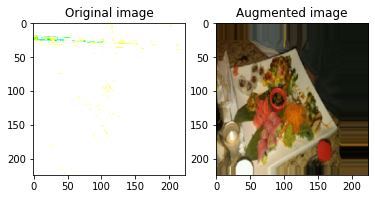

In [21]:
# Visualizing augmented and original image side by side
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

visualize(images[3],augmented_images[3])  

In [22]:
augmented_images[0].shape

(224, 224, 3)

In [23]:
## Let's try to simplify our model first
model_3 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_3 = model_3.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 98s 415ms/step - loss: 2.2184 - accuracy: 0.1799 - val_loss: 2.0231 - val_accuracy: 0.3125
Epoch 2/5
235/235 [==============================] - 100s 426ms/step - loss: 2.0701 - accuracy: 0.2579 - val_loss: 1.9129 - val_accuracy: 0.3094
Epoch 3/5
235/235 [==============================] - 98s 416ms/step - loss: 2.0033 - accuracy: 0.2947 - val_loss: 1.9257 - val_accuracy: 0.3266
Epoch 4/5
235/235 [==============================] - 96s 410ms/step - loss: 1.9689 - accuracy: 0.3161 - val_loss: 1.8688 - val_accuracy: 0.3594
Epoch 5/5
235/235 [==============================] - 98s 415ms/step - loss: 1.9475 - accuracy: 0.3284 - val_loss: 1.8056 - val_accuracy: 0.3812


In [26]:
# Let's try by normalizing our inputs
model_4 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    BatchNormalization(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 100s 425ms/step - loss: 2.7755 - accuracy: 0.2096 - val_loss: 2.4497 - val_accuracy: 0.1859
Epoch 2/5
235/235 [==============================] - 98s 416ms/step - loss: 2.4197 - accuracy: 0.2568 - val_loss: 2.3302 - val_accuracy: 0.2500
Epoch 3/5
235/235 [==============================] - 97s 412ms/step - loss: 2.2117 - accuracy: 0.2728 - val_loss: 2.2360 - val_accuracy: 0.2891
Epoch 4/5
235/235 [==============================] - 97s 413ms/step - loss: 2.0532 - accuracy: 0.3089 - val_loss: 1.9307 - val_accuracy: 0.3406
Epoch 5/5
235/235 [==============================] - 97s 413ms/step - loss: 1.9641 - accuracy: 0.3291 - val_loss: 1.9057 - val_accuracy: 0.3703


In [29]:
def preprocess_image(filename):
  image = tf.io.read_file(filename)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image,size=(224,224))
  image = image/255.
  image = tf.expand_dims(image,axis=0)
  return image

In [30]:
img = preprocess_image("/content/WhatsApp Image 2022-09-14 at 12.55.00.jpeg")

In [32]:
predictions = model_4.predict(img)

In [34]:
class_names[np.argmax(predictions)]

'grilled_salmon'

In [35]:
salmon = preprocess_image("/content/grilled-salmon-4-1200.jpg")

In [36]:
predictions = model_4.predict(salmon)
class_names[np.argmax(predictions)]

'pizza'